In [ ]:
#!pip install geopandas

In [1]:
import requests
import bqplot
import ipywidgets
import numpy as np
import pandas as pd

import geopandas as gpd
import matplotlib.pyplot as plt

# Geopandas

In [2]:
# build in dataset
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [4]:
# New York dataset
gdf_ny = gpd.read_file(gpd.datasets.get_path('nybb'))
gdf_ny

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


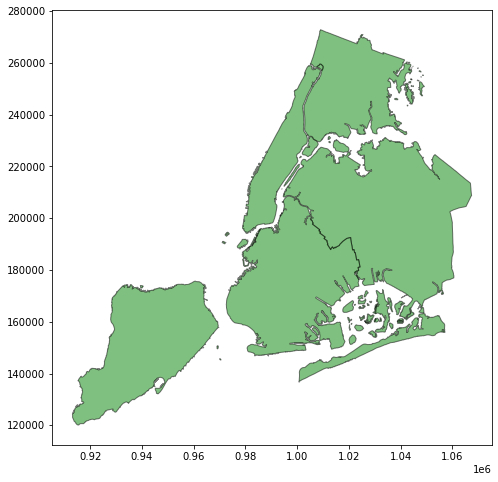

In [9]:
# Make viz
gdf_ny.plot(figsize=(8, 8), color='green', alpha=0.5, edgecolor='k')
plt.show()

# Geopandas and matplotlib
- Open access datasets: https://gis-cityofchampaign.opendata.arcgis.com/search?collection=Dataset

In [10]:
# Datasets that we are going to use:

# Council Districts
url_council = 'https://opendata.arcgis.com/datasets/1f75636917604299861fb408bbf79378_1.geojson'
# City owned properties
url_properties = 'https://opendata.arcgis.com/datasets/3ecbc7baf1a44110a98f6d4420432000_2.geojson'
# Apartments
url_apartments = 'https://opendata.arcgis.com/datasets/64154052c5a040e287bae1583d727825_8.geojson'

In [11]:
# councils
gdf_councils = gpd.read_file(url_council)
gdf_councils

,OBJECTID_1,District,Council_me,ShapeSTArea,ShapeSTLength,geometry
0,811,5,Vanna Pianfetti,1.838498e+08,211060.175261,"POLYGON ((-88.31441 40.11699, -88.31454 40.116..."
1,812,3,Daniel Iniguez,2.009197e+08,144362.359386,"POLYGON ((-88.27716 40.16364, -88.27732 40.163..."
2,813,1,Davion Williams,1.078965e+08,83420.727939,"POLYGON ((-88.22283 40.16000, -88.22283 40.160..."
3,814,4,Michael Foellmer,1.049800e+08,77363.320814,"POLYGON ((-88.26890 40.12733, -88.27076 40.127..."
4,815,2,Alicia Beck,5.164512e+07,62243.277115,"POLYGON ((-88.23537 40.10798, -88.23537 40.107..."


In [12]:
gdf_councils.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
gdf_councils.bounds

,minx,miny,maxx,maxy
0,-88.333303,40.061894,-88.257012,40.116995
1,-88.315071,40.098268,-88.239120,40.163956
2,-88.277158,40.107938,-88.221225,40.163721
3,-88.276971,40.083257,-88.240119,40.127432
4,-88.257818,40.083182,-88.228505,40.116346


In [14]:
gdf_councils.centroid

/var/folders/4f/f4pn1l0j12xdnk241b9bn59h0000gn/T/ipykernel_93488/2492373049.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_councils.centroid


0    POINT (-88.29985 40.08720)
1    POINT (-88.28230 40.13391)
2    POINT (-88.24309 40.13570)
3    POINT (-88.25983 40.10719)
4    POINT (-88.24095 40.10021)
dtype: geometry

<AxesSubplot:>

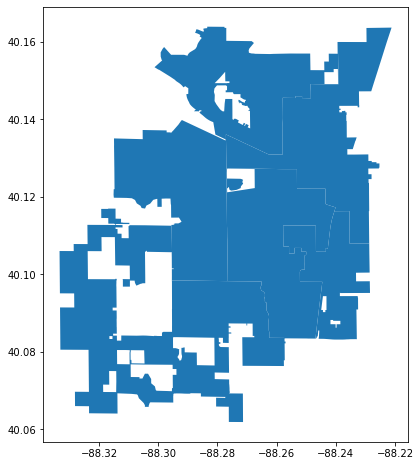

In [15]:
gdf_councils.plot(figsize=(8, 8))

<AxesSubplot:>

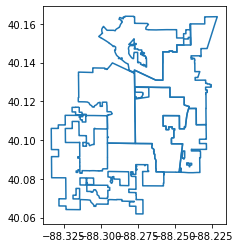

In [16]:
gdf_councils.boundary.plot()

In [17]:
# properties file
gdf_prop = gpd.read_file(url_properties)
print(gdf_prop.info())
gdf_prop.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       545 non-null    int64   
 1   COMMENTS       489 non-null    object  
 2   CB             216 non-null    object  
 3   DEPT           534 non-null    object  
 4   PIN            543 non-null    object  
 5   ACREAGE        544 non-null    object  
 6   CODE_TYPE      463 non-null    object  
 7   DESCRIPTION    540 non-null    object  
 8   TYPE           489 non-null    object  
 9   DEPT_ABBR      539 non-null    object  
 10  DESCRIP_ADDR   544 non-null    object  
 11  FUTURE         536 non-null    object  
 12  PA             493 non-null    float64 
 13  ZONING         475 non-null    object  
 14  ShapeSTArea    545 non-null    float64 
 15  ShapeSTLength  545 non-null    float64 
 16  geometry       545 non-null    geometry
dtypes: float64(3), geometry(1),

,OBJECTID,COMMENTS,CB,DEPT,PIN,ACREAGE,CODE_TYPE,DESCRIPTION,TYPE,DEPT_ABBR,DESCRIP_ADDR,FUTURE,PA,ZONING,ShapeSTArea,ShapeSTLength,geometry
0,1,,,PWD,412001326010,0.755*,A,Drainage/Boneyard,Boneyard Channel,PWD,Boneyard Channel,Flood Hazard Area,101.0,MHP,32930.497936,897.925620,"POLYGON ((-88.25043 40.13085, -88.25044 40.130..."
1,2,,None,NSD,422012226003,4.432*,D,City Redevelopment,Beardsley Park Plan,NSD,1110 N Neil,Neighborhood Plan,1.0,SF 1,1930.800333,272.145439,"POLYGON ((-88.24300 40.12699, -88.24300 40.127..."
2,3,,None,NSD,422012226004,0.181*,D,City Redevelopment,Beardsley Park Plan,NSD,1110 N Neil,Neighborhood Plan,1.0,SF 1,7915.196446,372.150616,"POLYGON ((-88.24300 40.12681, -88.24300 40.126..."
3,4,,None,NSD,422012226005,0.186*,D,City Redevelopment,Beardsley Park Plan,NSD,1108 N Neil,Neighborhood Plan,1.0,SF 1,8104.292805,377.890980,"POLYGON ((-88.24344 40.12663, -88.24300 40.126..."
4,5,,None,NSD,422012226006,0.185*,D,City Redevelopment,Beardsley Park Plan,NSD,1106 N Neil,Neighborhood Plan,1.0,SF 1,8088.671149,377.710096,"POLYGON ((-88.24344 40.12645, -88.24299 40.126..."


In [20]:
print(gdf_prop['TYPE'].unique())

['Boneyard Channel' 'Beardsley Park Plan' 'Parking Deck'
 'Bristol Park Plan' 'Vacant Lot' 'University Rain Garden'
 'Beaver Lake Channel' 'Public Works' 'Dray Basin East of Salt Dome'
 'Fire Station 3' 'Boneyard/Channel' 'Fire Station 5'
 'Sanitary Pump Station' 'Parkway' 'Park' 'Neighborhood Garden'
 'Parking Lot' 'Alley' 'City Building' 'Police Station' 'Fire Station 1'
 'Library' 'Healey St Basin' 'Fire Station 4' 'Mini park' 'Phinney Branch'
 'Phinney Branch ' 'Fire Station 2' 'Fire Station 6' 'Parking Lot Leased'
 'Public Works Storage' 'Boneyard Channel Park' 'Bike Path RR'
 'North First Street Plan' 'ROW Green Space' 'Second St Detention Basins'
 'Univeristy Rain Garden' 'Second St Rain Garden' 'Vacant Lot Burnham'
 'Multiuse Path/LAMAR Storage' 'Parkettes' 'Landfill'
 'University Rain Gardne' 'Vacant Field' 'NSP Grant' 'Boneyard'
 'Detention Basin' 'Drainage/Greenspace'
 'West Washington St. Drainage Improvement Project' None "Sheriff's Sale"
 'Judicial Deed']


In [21]:
gdf_prop.groupby(['TYPE'])[['OBJECTID']].count()

,OBJECTID
TYPE,
Alley,1
Beardsley Park Plan,21
Beaver Lake Channel,2
Bike Path RR,6
Boneyard,2
Boneyard Channel,111
Boneyard Channel Park,1
Boneyard/Channel,4
Bristol Park Plan,100


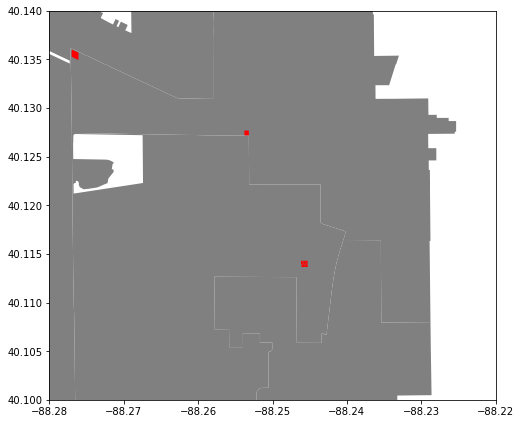

In [27]:
fig, ax = plt.subplots(figsize=(8, 8))

gdf_councils.plot(ax=ax, color='grey')

filter_1 = gdf_prop['TYPE'].str.contains('Fire Station')
filter_2 = ~gdf_prop['TYPE'].isna()

gdf_prop.loc[(filter_1)&(filter_2)].plot(ax=ax, color='red')

# Zoom in
ax.set_xlim(-88.28, -88.22)
ax.set_ylim(40.10, 40.14)

plt.show()

In [28]:
# Apartment file
gdf_apat = gpd.read_file(url_apartments)
print(gdf_apat.info())
gdf_apat.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2826 entries, 0 to 2825
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   OBJECTID           2826 non-null   int64              
 1   Address            2656 non-null   object             
 2   Parcel             2649 non-null   object             
 3   Units              2673 non-null   object             
 4   Stories            2653 non-null   object             
 5   UniqueID           1706 non-null   float64            
 6   Building_Name      2801 non-null   object             
 7   Complex_Name       2087 non-null   object             
 8   Case_Number        1047 non-null   object             
 9   Building_Type      2666 non-null   object             
 10  Status             1046 non-null   object             
 11  Last_Date          959 non-null    datetime64[ns, UTC]
 12  Comments           1122 non-null   objec

,OBJECTID,Address,Parcel,Units,Stories,UniqueID,Building_Name,Complex_Name,Case_Number,Building_Type,...,Last_Date,Comments,Safety_Comments,Fire_Alarms,Sprinkler,Managing_Company,MFRecyclingStatus,ShapeSTArea,ShapeSTLength,geometry
0,1,2009 Moreland Blvd,412001126038,36,3,0.0,2009 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,2007-10-29 05:00:00+00:00,,,Yes,Yes,None,Yes,19657.996933,929.167804,"POLYGON ((-88.25315 40.14017, -88.25315 40.140..."
1,2,2011 Moreland Blvd,412001126038,36,3,1.0,2011 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,2007-10-29 05:00:00+00:00,,,Yes,Yes,None,Yes,19735.512411,950.194217,"POLYGON ((-88.25260 40.14057, -88.25256 40.140..."
2,3,2007 Moreland Blvd,412001126038,24,3,2.0,2007 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,2007-10-29 05:00:00+00:00,,,Yes,Yes,None,Yes,13970.179208,678.398035,"POLYGON ((-88.25274 40.14045, -88.25274 40.140..."
3,4,2003 Moreland Blvd,412001126038,36,3,3.0,2003 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,2007-10-29 05:00:00+00:00,,,Yes,Yes,None,Yes,19739.423285,941.358477,"POLYGON ((-88.25154 40.13978, -88.25156 40.139..."
4,5,2005 Moreland Blvd,412001126038,24,3,4.0,2005 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,2007-10-29 05:00:00+00:00,,,Yes,Yes,None,Yes,13065.121447,636.744457,"POLYGON ((-88.25351 40.13934, -88.25348 40.139..."


In [29]:
gdf_apat['Building_Type'].unique()

array(['Complex', 'Building', 'House', 'Over Commercial', None,
       'Fraternity or Sorority', 'Other'], dtype=object)

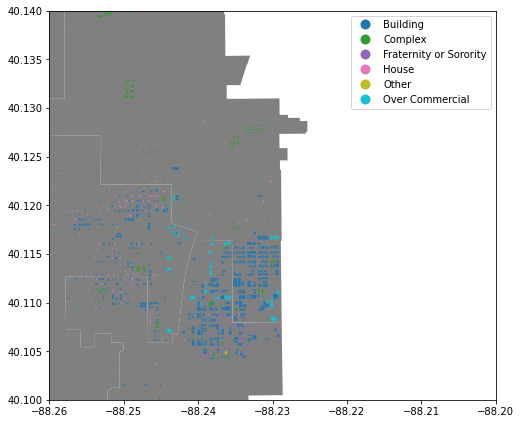

In [31]:
fig, ax = plt.subplots(figsize=(8, 8))

gdf_councils.plot(ax=ax, color='grey')
gdf_apat.plot(ax=ax, column='Building_Type', cmap='tab10', legend=True)

#zoom in
ax.set_xlim(-88.26, -88.20)
ax.set_ylim(40.10, 40.14)

plt.show()

In [32]:
# add interaction

building_types = gdf_apat['Building_Type'].unique().tolist()
selector = ipywidgets.SelectMultiple(options=building_types , description='Building Type')
selector

SelectMultiple(description='Building Type', options=('Complex', 'Building', 'House', 'Over Commercial', None, …

In [34]:

def make_plot(selected_type):
    print('Selected Type:', selected_type)
    
    fig, ax = plt.subplots(figsize=(8, 8))

    gdf_councils.plot(ax=ax, color='grey')
    
    if len(selected_type) == 0:
        gdf_apat.plot(ax=ax, column='Building_Type', cmap='tab10', legend=True)
    else:
        gdf_apat_sel = gdf_apat.loc[gdf_apat['Building_Type'].isin(selected_type)]
        gdf_apat_sel.plot(ax=ax, column='Building_Type', cmap='tab10', legend=True)

    #zoom in
    ax.set_xlim(-88.26, -88.20)
    ax.set_ylim(40.10, 40.14)

    plt.show()

building_types = gdf_apat['Building_Type'].unique().tolist()
selector = ipywidgets.SelectMultiple(options=building_types , description='Building Type')
ipywidgets.interact(make_plot, selected_type=selector)

interactive(children=(SelectMultiple(description='Building Type', options=('Complex', 'Building', 'House', 'Ov…

<function __main__.make_plot(selected_type)>

# GeoJSON and Bqplot

In [39]:
# Map Data

council_map_data = requests.get(url_council).json()
apartment_map_data = requests.get(url_apartments).json()

# Scale
geo_sc = bqplot.Mercator(scale_factor = 200000, center=(-88.28, 40.12))

# Mark
council_map = bqplot.Map(map_data=council_map_data, 
                         scales={'projection':geo_sc})
apartment_map = bqplot.Map(map_data=apartment_map_data, 
                           scales={'projection':geo_sc})

# Fig
fig = bqplot.Figure(marks=[council_map, apartment_map])
fig

Figure(fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, marks=[Map(hovered_styles={'hovered_fill…